# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 5

**Author 1 (sciper):** Camillo Nicolò De Sabbata (335004)  

**Author 2 (sciper):** Gianluca Radi (334736)

**Author 3 (sciper):** Alessandro Dalbesio (352298)

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [53]:
import tarfile
import os

data_base_path = os.path.join(os.curdir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

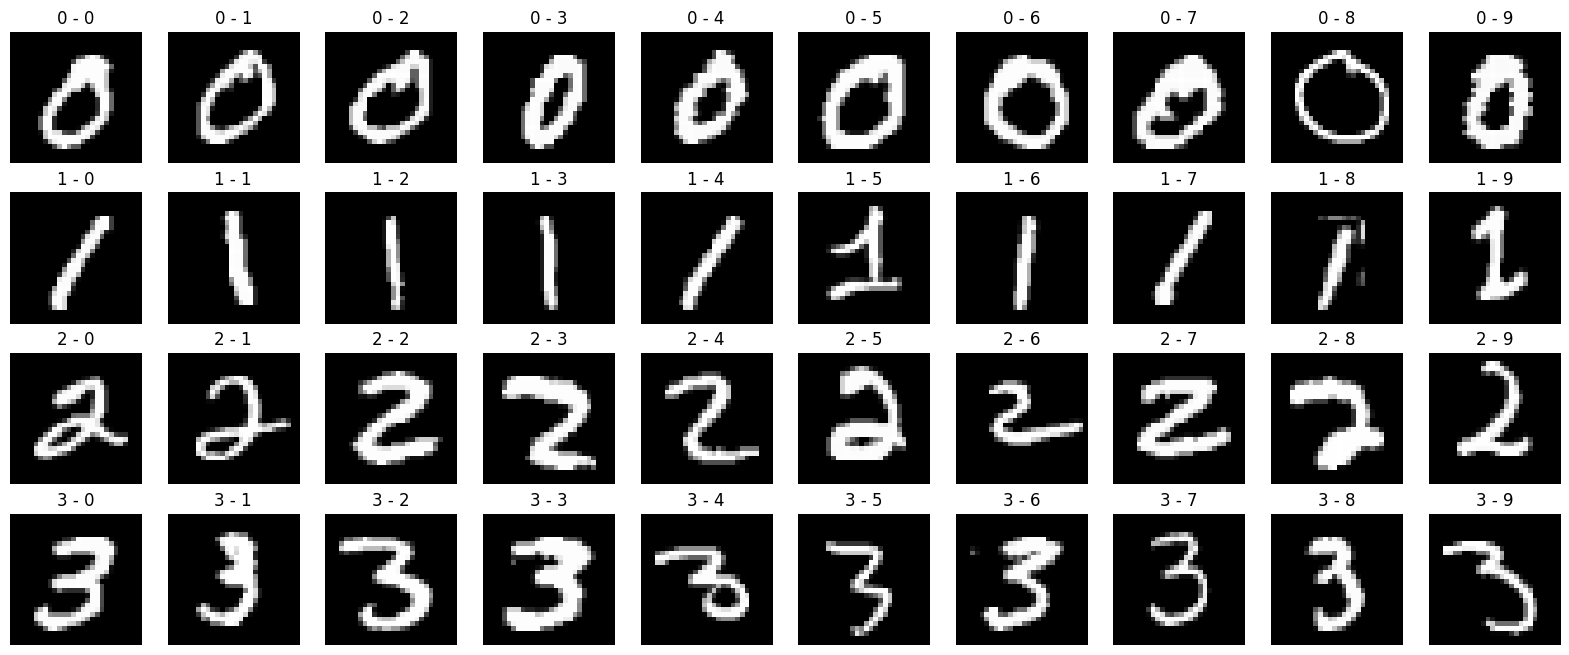

In [54]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Remove the .png from the images names
zeros_names = [nm[:-4].replace('_', ' - ') for nm in zeros_names]
ones_names = [nm[:-4].replace('_', ' - ') for nm in ones_names]
twos_names = [nm[:-4].replace('_', ' - ') for nm in twos_names]
threes_names = [nm[:-4].replace('_', ' - ') for nm in threes_names]

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

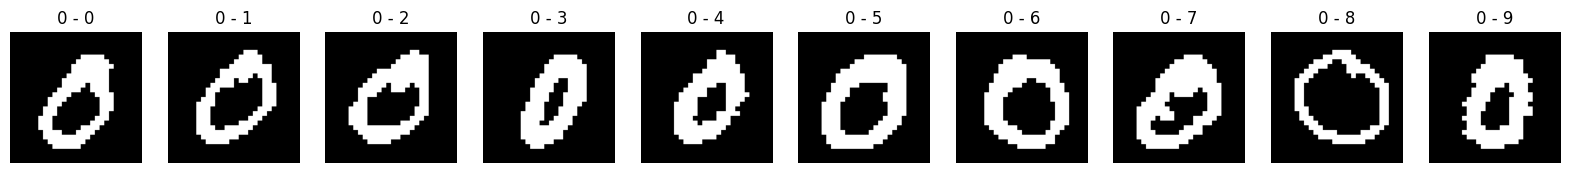

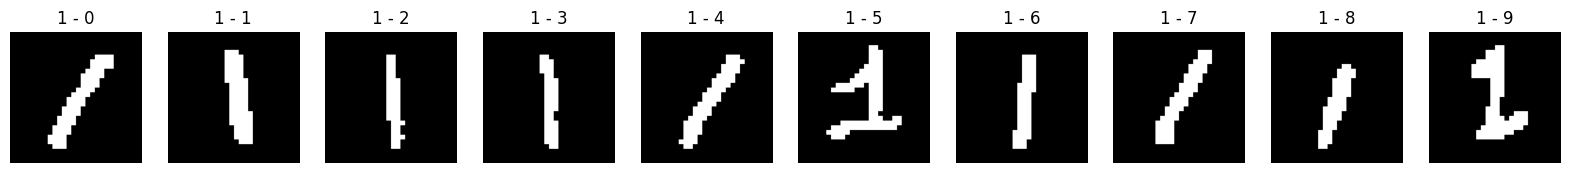

In [55]:
from skimage.filters import unsharp_mask, threshold_otsu
from skimage.morphology import remove_small_objects
import cv2, numpy as np

# Copy the images into new arrays (to avoid modifying the original ones)
zeros_processed = []
ones_processed = []

# Preprocess images
for i in range(len(zeros_im)):
    img = unsharp_mask(zeros_im[i], radius=50, amount=1.5) # Sharpen image
    img = cv2.resize(img, (0,0), fx=10, fy=10, interpolation=cv2.INTER_NEAREST) # Increase resolution to have better results
    img = img > threshold_otsu(img) # Binarize image
    img = np.ndarray.astype(img, np.uint8) # Convert to uint8
    img[img == True] = 255 # Convert True to 255
    img[img == False] = 0 # Convert False to 0
    zeros_processed.append(img) # Add image to the list

for i in range(len(ones_im)):
    img = unsharp_mask(ones_im[i], radius=50, amount=1.5) # Sharpen image
    img = cv2.resize(img, (0,0), fx=10, fy=10, interpolation=cv2.INTER_NEAREST) # Increase resolution to have better results
    img = img > threshold_otsu(img) # Binarize image
    img = remove_small_objects(img, min_size=750) # Remove small objects
    img = np.ndarray.astype(img, np.uint8) # Convert to uint8
    img[img == True] = 255 # Convert True to 255
    img[img == False] = 0 # Convert False to 0
    ones_processed.append(img) # Add image to the list

# Plot zeros
fig, axes = plt.subplots(1, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes, zeros_processed, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

# Plot ones
fig, axes = plt.subplots(1, len(ones_im), figsize=(20, 8))
for ax, im, nm in zip(axes, ones_processed, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

#### Discussion

Firstly we have applied the function <code>unsharp_mask</code> to enhance the contourns of the images. The parameters have been choosen sperimentally. <br>
Then we have augmented the resolution of our images to be able to reduce the approximation introduced by the low number of pixels in the original images. We saw that without this step we weren't able to get good results in the following steps. <br>
To avoid problems introduced by different colors in the images we have applied a threshold (with the method <code>threshold_otsu</code>) to have binary images (black and white).<br>
To remove small object that weren't important for the study of the numbers we have also applied the method <code>remove_small_objects</code> to the one's images.

### 1.2. Get descriptors (4 pts)

In [56]:
import cv2
import numpy as np
from scipy.fft import fft

def getOutline(img):
    
    # Function to calculate the distance between two points
    def distance(p1, p2): 
        return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2) 

    height = img.shape[0] # Get the height of the image (needed to invert the y axis)

    # Get the contours with opencv
    contour_points,_ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # Get the external points and dont'approximate the contour

    # Get the points of the contour in a format easier to work with
    points = np.empty((len(contour_points[0][:,0,0])+1, 2))
    for i in range(len(contour_points[0][:,0,0])):
        points[i] = [contour_points[0][i,0,0], height - contour_points[0][i,0,1]]
    points[-1] = [contour_points[0][0,0,0], height - contour_points[0][0,0,1]] # Add the first point to the end to close the contour

    # Get the sum of the distances between the all the points of the contour
    sumOfDistances = 0
    for i in range(len(points)-1):
        sumOfDistances += distance(points[i], points[i+1]) 
    N = 100 # Number of points in the interpolated contour
    eps = sumOfDistances/N # Distance between each point of the interpolated contour

    # Interpolate the contour
    currentPoint = points[0]
    nextPoint = points[1]
    k = 1
    contourPoints = [currentPoint]
    while k != len(points)-2:
        dist = 0
        while dist + distance(currentPoint, nextPoint) < eps and k != len(points)-2:
            k += 1
            dist += distance(currentPoint, nextPoint)
            currentPoint = nextPoint
            nextPoint = points[k]
        contourPoints.append(currentPoint + (eps - dist)*(nextPoint - currentPoint)/distance(currentPoint, nextPoint)) # Interpolate
        currentPoint = contourPoints[-1]

    # Return the interpolated contour
    return np.array(contourPoints)

def convertPixelToComplex(contour):
    # Return the contour as a list of complex numbers (the origin is in the bottom left corner)
    return contour[:,0] + 1j*contour[:,1]


def convertComplexToPixel(contour):
    # Return the contour as a list of points (the origin is in the bottom left corner)
    return np.array([contour.real, contour.imag]).T

def get_descriptors(img: np.ndarray) -> np.ndarray:
    # Interpolate the contour
    countourn = getOutline(img)    
    
    # Transform the points of the contour to complex numbers
    countourn_complex = convertPixelToComplex(countourn)

    # Apply Fourier transform
    descriptors = fft(countourn_complex)

    # Return the descriptors
    return descriptors

#### Discussion

In this section we are doing the following steps:
- We are getting the 2D coordinates of the points of the contourn
- We are interpolating between the points to have a continuous contourn
- We are sampling the contourn at a constant distance
- We are converting the discretized contourn into a discrete complex 1D signal. Since the contourn has been sampled at a constant distance also the discrete complex 1D signal will be sampled at a constant distance. Since we don't save the distance between the points we need to be sure that the distance between the samples is the same to be able to apply the Discrete Fourier Transform succesfully (otherwise we won't be able to reconstruct the original signal succesfully).
- Since we have now a complex discrete 1D signal we can apply to it the 1D Discrete Fourier Transform (computed with the fft method) to get the descriptors of the images (which are the Fourier Coefficients of the images).

It's important to note that in this case since we are working with a complex signal the spectrum of our 1D complex signal is not simmetric and so the descriptors for the same frequencies (but with opposite signs) can be different.

### 1.3. Study effect of descriptors (6 pts)

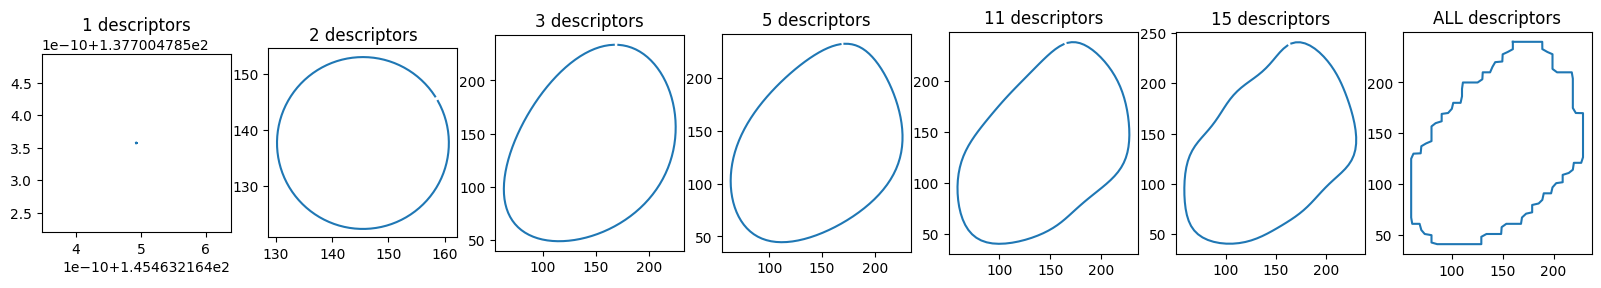

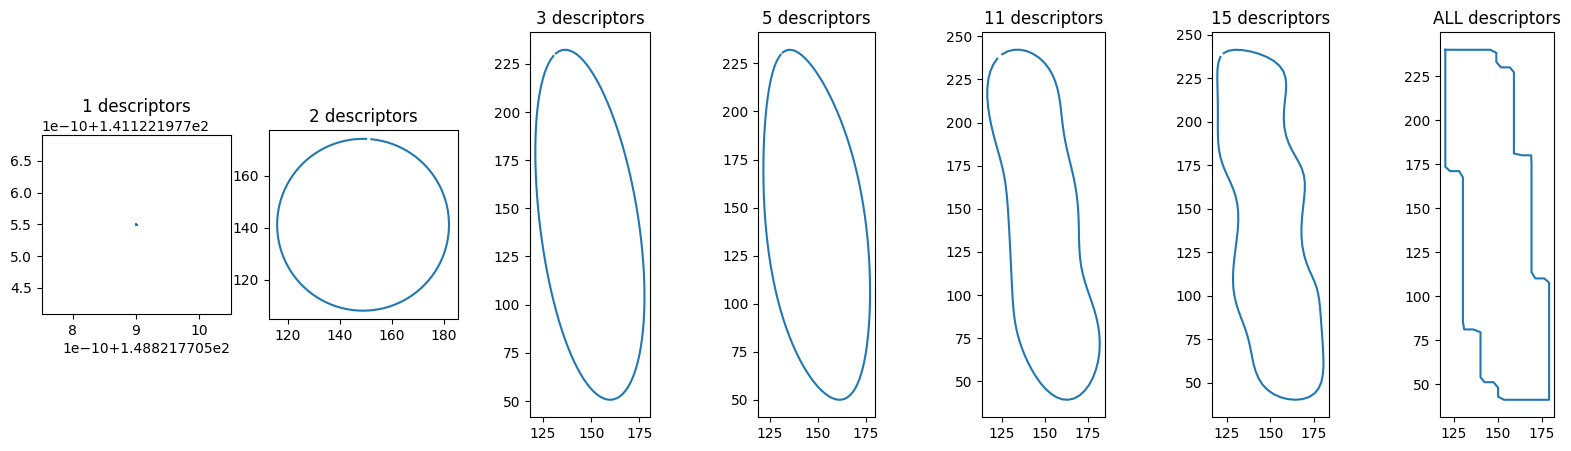

In [57]:
from scipy.fft import ifft

# Define increasing set sizes of the descriptors.
descr_set_sizes = [1, 2, 3, 5, 11, 15]


# Define images for which you will show the recovery.
zero = zeros_processed[1]
one = ones_processed[1]


# Get the descriptors of the images
zeroDescriptors = get_descriptors(zero)
oneDescriptors = get_descriptors(one)


# Reconstruct the images (zero)
zero_reconstructed = []
for size in descr_set_sizes:
    # Reduce the number of descriptors based on the set size
    zeroDescriptorsReduced = zeroDescriptors.copy()
    if size != 1:
        zeroDescriptorsReduced[size//2 +size % 2 :-size//2] = 0
    else:
        zeroDescriptorsReduced[1:] = 0

    # Apply inverse Fourier transform
    zero_reconstructed.append(ifft(zeroDescriptorsReduced))
zero_reconstructed.append(ifft(zeroDescriptors))


# Reconstruct the images (one)
one_reconstructed = []
for size in descr_set_sizes:
    # Reduce the number of descriptors based on the set size
    oneDescriptorsReduced = oneDescriptors.copy()
    if size != 1:
        oneDescriptorsReduced[size//2 +size % 2 :-size//2] = 0
    else:
        oneDescriptorsReduced[1:] = 0

    # Apply inverse Fourier transform
    one_reconstructed.append(ifft(oneDescriptorsReduced))
one_reconstructed.append(ifft(oneDescriptors))

descr_set_sizes.append('ALL')

# Plot the results
fig, axes = plt.subplots(1, len(descr_set_sizes), figsize=(20, 5))
for ax, im, nm in zip(axes, zero_reconstructed,descr_set_sizes):
    im = convertComplexToPixel(im)
    ax.plot(im[:,0], im[:,1])
    ax.set_aspect('equal')
    ax.set_title(f"{nm} descriptors")
plt.show()

fig, axes = plt.subplots(1, len(descr_set_sizes), figsize=(20, 5))
for ax, im, nm in zip(axes, one_reconstructed, descr_set_sizes):
    im = convertComplexToPixel(im)
    ax.plot(im[:,0], im[:,1])
    ax.set_aspect('equal')
    ax.set_title(f"{nm} descriptors")
plt.show()

#### Discussion

From the previous graphs we can make the following remarks:
- The first descriptor (f=0) is the one that represents the "continuous" component that is the baricentrum of the number
- The second descriptor (+f1) and the third descriptor (-f1) are the onest that represent the main shape of the object. We see that the shapes obtained from the reconstruction with two descriptors are bigger if the original image is a one. With the first three descriptors we are able to clearly separate by hand the ones from the zeros.
- If we add other descriptors to the images we add higher components (edges and details) each descriptor, as expected, add less contents that the ones before him

From this we can understand that the fact that the most informations are contained in the first descriptors and that as a consequence we might consider store and elaborate a lower number of descriptors than all the original ones.

### 1.4 Clustering (2 pts)

In [58]:
def plot_feature(zeros_f1, zeros_f2, ones_f1, ones_f2, title):
    # Get the absolute value of the features
    zeros_f1 = np.abs(zeros_f1)
    zeros_f2 = np.abs(zeros_f2)
    ones_f1 = np.abs(ones_f1)
    ones_f2 = np.abs(ones_f2)
    
    # Plot features for all images
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    
    # Plot the features of the zeros
    ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
    
    # Plot the features of the ones
    ax.scatter(ones_f1, ones_f2, color='b', label='ones')

    # Set the labels and the title
    ax.set_xlabel("First descriptor")
    ax.set_ylabel("Second descriptor")
    ax.legend(loc='best')
    plt.title(title)
    plt.show()

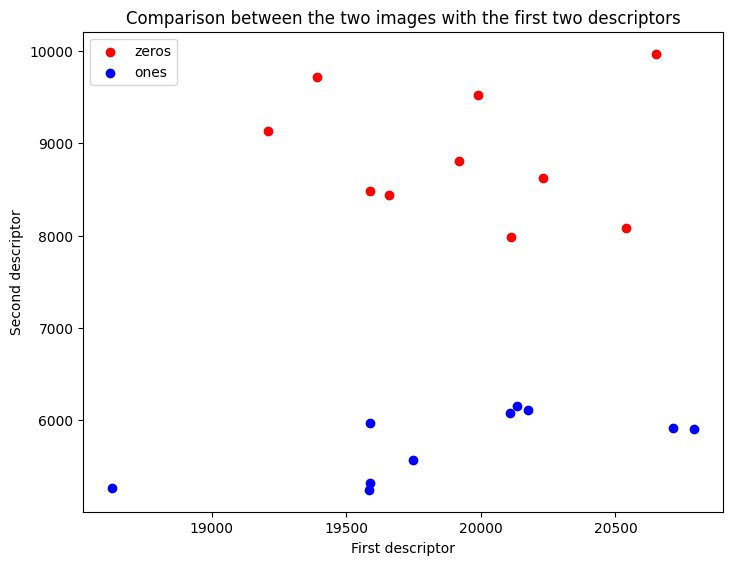

In [59]:
# First feature for all "0"s
zeros_f1 = []
# Second feature for all "0"s
zeros_f2 = []
# Fist feature for all "1"s
ones_f1 = []
# Second feature for all "1"s
ones_f2 = []

# Loop for each zero image
for zero in zeros_processed:
    # Get the descriptors of the image
    descriptors = get_descriptors(zero)
    # Add the first feature
    zeros_f1.append(abs(descriptors[0]))
    # Add the second feature
    zeros_f2.append(abs(descriptors[1]))

# Loop for each one image
for one in ones_processed:
    # Get the descriptors of the image
    descriptors = get_descriptors(one)
    # Add the first feature
    ones_f1.append(abs(descriptors[0]))
    # Add the second feature
    ones_f2.append(abs(descriptors[1]))

# Plot features for all images
plot_feature(zeros_f1, zeros_f2, ones_f1, ones_f2, "Comparison between the two images with the first two descriptors")

#### Discussion


### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

TODO

#### Implementation

In [60]:

def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    img_descriptors = get_descriptors(img)
    
    if inv_to_rotation:
        img_descriptors = np.abs(img_descriptors)

    if inv_to_scale:
        img_descriptors = img_descriptors/img_descriptors[1]
    
    if inv_to_translation:
        img_descriptors = img_descriptors[1:] # The first descriptor contains the position informations ==> remove it

    return img_descriptors
    

def random_rotate(img, rotation_angle):
    # Rotate the image
    rotatedImage = skimage.transform.rotate(img, rotation_angle)
    # Convert the image to uint8
    rotatedImage = skimage.img_as_ubyte(rotatedImage)
    # Return the image
    return skimage.img_as_ubyte(rotatedImage)

def random_translation(img, tx, ty):
    newImage = np.zeros((img.shape[0] + tx, img.shape[1] + ty), dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            newImage[i + tx, j + ty] = img[i, j]
    
    return newImage

    
# Define custom rotation function. You may add other parameters to the function.
def random_scale(img, scaleFactor):
    scaledImage = skimage.transform.resize(img, (img.shape[0] * scaleFactor, img.shape[1] * scaleFactor),anti_aliasing=True)
    return skimage.img_as_ubyte(scaledImage)

##### Invariant to translation

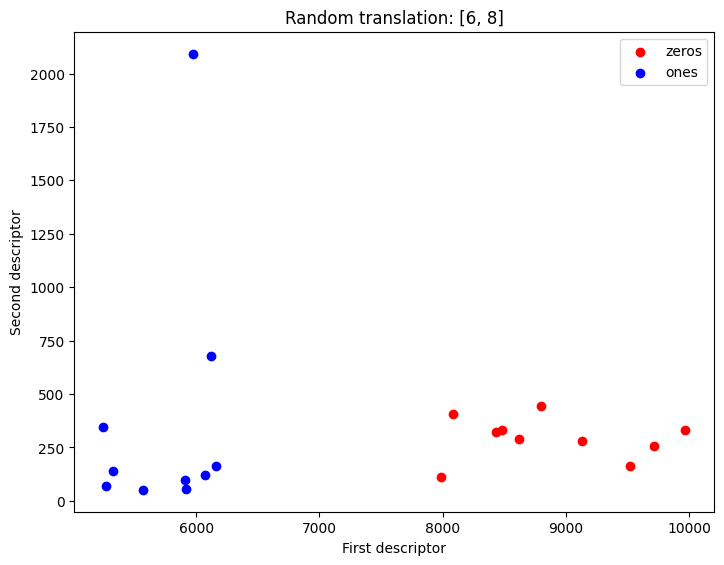

In [61]:
tx = np.random.randint(0, 10)
ty = np.random.randint(0, 10)
zeros_f1 = []
zeros_f2 = []
ones_f1 = []
ones_f2 = []
for i in range(len(zeros_processed)):
    zero_processed_translated = random_translation(zeros_processed[i], tx, ty)
    descriptors = get_invariant_features(zero_processed_translated, inv_to_translation=True)
    zeros_f1.append(abs(descriptors[0]))
    zeros_f2.append(abs(descriptors[1]))

for i in range(len(ones_processed)):
    one_processed_translated = random_translation(ones_processed[i], tx, ty)
    descriptors = get_invariant_features(one_processed_translated, inv_to_translation=True)
    ones_f1.append(abs(descriptors[0]))
    ones_f2.append(abs(descriptors[1]))

plot_feature(zeros_f1, zeros_f2, ones_f1, ones_f2, f"Random translation: [{tx}, {ty}]")



##### Invariant to rotation

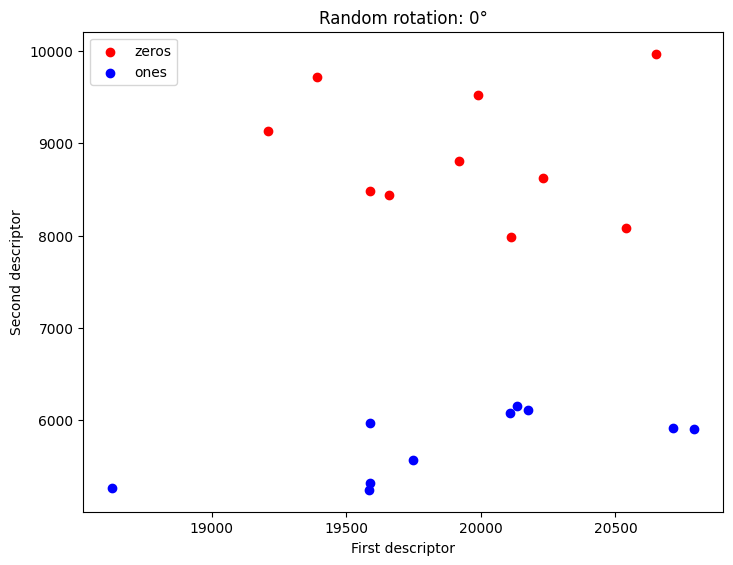

In [62]:
rotation = np.random.randint(0, 360)
zeros_f1 = []
zeros_f2 = []
ones_f1 = []
ones_f2 = []
for i in range(len(zeros_processed)):
    zero_processed_rotated = random_rotate(zeros_processed[i], rotation)
    descriptors = get_invariant_features(zero_processed_rotated, inv_to_rotation=True)
    zeros_f1.append(abs(descriptors[0]))
    zeros_f2.append(abs(descriptors[1]))

for i in range(len(ones_processed)):
    one_processed_rotated = random_rotate(ones_processed[i], rotation)
    descriptors = get_invariant_features(one_processed_rotated, inv_to_rotation=True)
    ones_f1.append(abs(descriptors[0]))
    ones_f2.append(abs(descriptors[1]))

plot_feature(zeros_f1, zeros_f2, ones_f1, ones_f2, f"Random rotation: {rotation}°")

##### Invariant to scaling

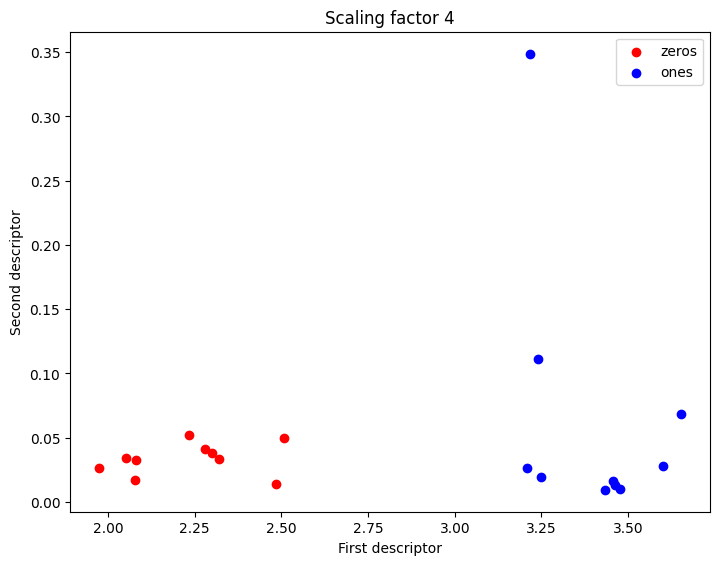

In [63]:
scaling = np.random.randint(1, 10)
rotation = np.random.randint(0, 360)

zeros_f1 = []
zeros_f2 = []
ones_f1 = []
ones_f2 = []
for i in range(len(zeros_processed)):
    zero_processed_rotated = random_scale(zeros_processed[i], scaling)
    descriptors = get_invariant_features(zero_processed_rotated, inv_to_scale=True)
    zeros_f1.append(abs(descriptors[0]))
    zeros_f2.append(abs(descriptors[2]))

for i in range(len(ones_processed)):
    one_processed_rotated = random_scale(ones_processed[i], scaling)
    descriptors = get_invariant_features(one_processed_rotated, inv_to_scale=True)
    ones_f1.append(abs(descriptors[0]))
    ones_f2.append(abs(descriptors[2]))

plot_feature(zeros_f1, zeros_f2, ones_f1, ones_f2, f"Scaling factor {scaling}")

##### Invariant to translation, rotation and scaling

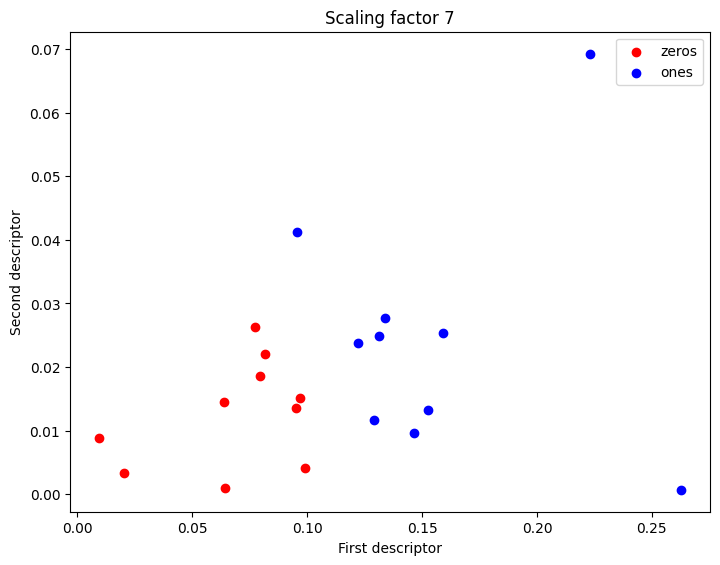

In [64]:
tx = np.random.randint(0, 10)
ty = np.random.randint(0, 10)
scaling = np.random.randint(1, 10)
rotation = np.random.randint(0, 360)

zeros_f1 = []
zeros_f2 = []
ones_f1 = []
ones_f2 = []
for i in range(len(zeros_processed)):
    zero_processed_scale = random_scale(zeros_processed[i], scaling)
    zero_processed_translated = random_translation(zero_processed_scale, tx, ty)
    zero_processed_rotated = random_rotate(zero_processed_translated, rotation)
    descriptors = get_invariant_features(zero_processed_rotated, inv_to_scale=True, inv_to_rotation=True, inv_to_translation=True)
    zeros_f1.append(abs(descriptors[2]))
    zeros_f2.append(abs(descriptors[3]))

for i in range(len(ones_processed)):
    one_processed_scale = random_scale(ones_processed[i], scaling)
    one_processed_translated = random_translation(one_processed_scale, tx, ty)
    one_processed_rotated = random_rotate(one_processed_translated, rotation)
    descriptors = get_invariant_features(one_processed_rotated, inv_to_scale=True, inv_to_rotation=True, inv_to_translation=True)
    ones_f1.append(abs(descriptors[2]))
    ones_f2.append(abs(descriptors[3]))

plot_feature(zeros_f1, zeros_f2, ones_f1, ones_f2, f"Scaling factor {scaling}")

#### Discussion

We can do the following remarks:
- In the case of the invariance to translation we were able to get pretty good results. This is because the second feature (as seen in the previous section) contains sufficient informations about the original object to make possible the separation of the objects in two clusters (even if the third feature is not that usefull to divide the clusters)
- In the case of the invariance to rotation we were able to get pretty good results. This is because we have used both the first and the second descriptors that are the ones which contains the more information. In this case the second descriptor was the most helpfull one to separate in clusters since we saw that the first descriptor have few problems with the rotational method applied. This is due to the fact that the first descriptor represents the baricentrum and we verified that the rotation angle changes a little bit the baricentrum (due to the pixels approximation). 
- Even in the case of scaling we were able to obtain good results...

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

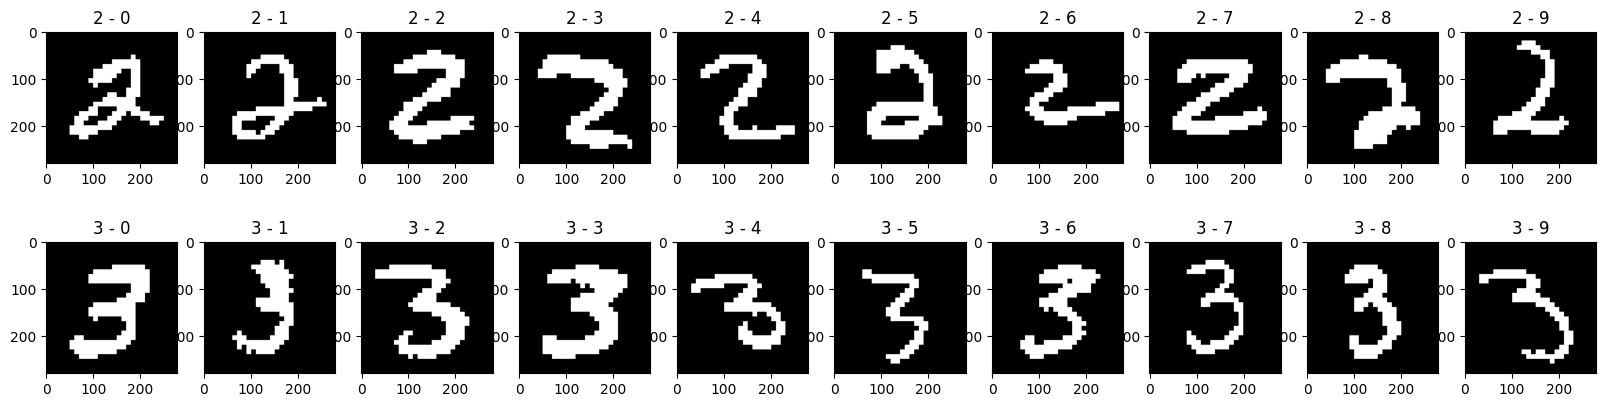

In [65]:
from skimage.filters import unsharp_mask
from skimage.morphology import  disk, closing

# Copy the images into new arrays (to avoid modifying the original ones)
twos_processed = []
threes_processed = []

# Loop for each image
for i in range(len(twos_im)):
    # Apply unsharp mask
    img = unsharp_mask(twos_im[i], radius=1, amount=1)
    # Increase shape
    img = cv2.resize(img, (0,0), fx=10, fy=10, interpolation=cv2.INTER_NEAREST) # Increase resolution to have better results
    # Thresholding with skimage
    img = img > threshold_otsu(img)
    img = remove_small_objects(img, min_size=750) # Remove small objects
    img = np.ndarray.astype(img, np.uint8) # Convert to uint8
    # Apply closing
    twos_processed.append(img)

# Loop for each image
for i in range(len(threes_im)):
    # Apply unsharp mask
    img = unsharp_mask(threes_im[i], radius=1, amount=1)
    # Increase shape
    img = cv2.resize(img, (0,0), fx=10, fy=10, interpolation=cv2.INTER_NEAREST) # Increase resolution to have better results
    # Apply closing
    img = img > threshold_otsu(img)
    img = remove_small_objects(img, min_size=750) # Remove small objects
    img = np.ndarray.astype(img, np.uint8) # Convert to uint8
    threes_processed.append(img)

# Plot images
fig, axes = plt.subplots(2, len(twos_processed), figsize=(20, 5))
for i in range(len(twos_processed)):
    axes[0, i].imshow(twos_processed[i], cmap='gray')
    axes[0, i].set_title(twos_names[i])
    axes[1, i].imshow(threes_processed[i], cmap='gray')
    axes[1, i].set_title(threes_names[i])

plt.show()


In [73]:
# 2D plot with 2-dimensional feature vectors based on custom definitions of perimeter and area for each image of "2" and "3"

def get_perimeter(img):
    # Get outline
    contour_points, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    # Get perimeter
    perimeter = cv2.arcLength(contour_points[0], True)
    return perimeter

def get_area(img):
    # Count number of white pixels
    contour_points, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    area = np.sum(img == 1)
    return area


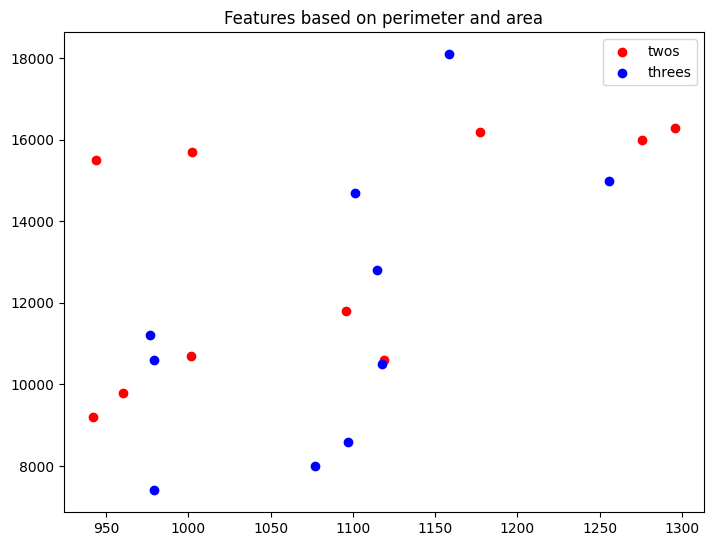

In [74]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = [ get_perimeter(twos_processed[i]) for i in range(len(twos_processed)) ]
twos_f2 = [ get_area(twos_processed[i]) for i in range(len(twos_processed)) ]
threes_f1 = [ get_perimeter(threes_processed[i]) for i in range(len(threes_processed)) ]
threes_f2 = [ get_area(threes_processed[i]) for i in range(len(threes_processed)) ]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

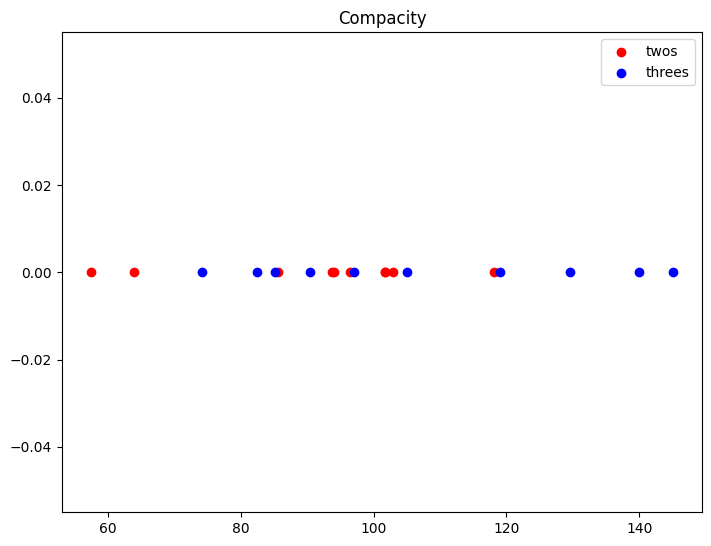

In [68]:
# 1D plot of the compacity
def get_compacity(img):
    # Get perimeter
    perimeter = get_perimeter(img)
    # Get area
    area = get_area(img)
    # Get compacity
    compacity = perimeter**2 / area
    return compacity

twos_compacity = [ get_compacity(twos_processed[i]) for i in range(len(twos_processed)) ]
threes_compacity = [ get_compacity(threes_processed[i]) for i in range(len(threes_processed)) ]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_compacity, np.zeros(len(twos_compacity)), color='r', label='twos')
ax.scatter(threes_compacity, np.zeros(len(threes_compacity)), color='b', label='threes')
ax.legend(loc='best')
plt.title("Compacity")
plt.show()

####  Discussion

The pre-processing of the images of "2"s and "3"s consists of enhancing their countorns and closing small holes. The resulting images are then shown.\
At this point, we found the periment of "2"s and "3"s by finding their countorns and measuring their lengths. For the areas, a simple count of the white pixels was employed.\
The 2D clustering based on the two described features shows mixed results, as the disposition of the images on the plot does not allow a clear distinction between "2"s and "3"s.\
This might be due to the fact that the perimeter and area of "2"s and "3"s are too similar to base the clustering on them.\
It follows that the 1D clustering based on the notion of compacity does not provide good results either.

### 2.2. Additional method (4 pts)

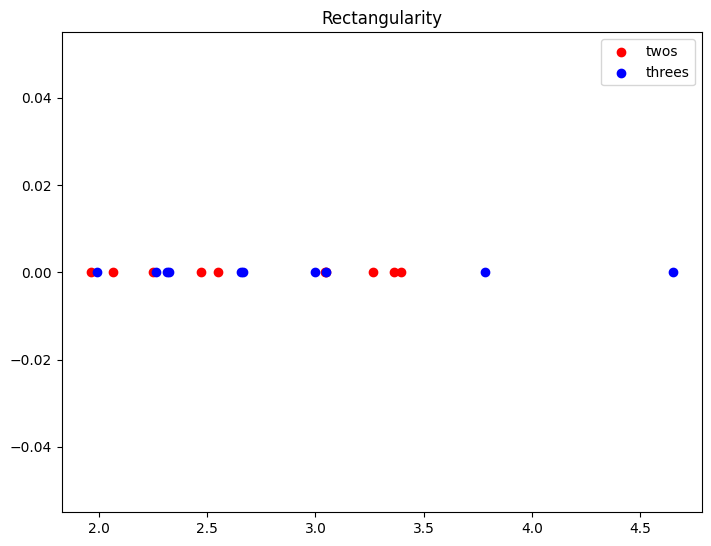

In [69]:
# Rectangularity: ratio between the area of the bounding box and the area of the image
def get_rectangularity(img):
    contour, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    # Get bounding box
    x, y, w, h = cv2.boundingRect(contour[0])
    # Get area of bounding box
    area_bb = w * h
    # Get area of image
    area_img = get_area(img)
    # Get rectangularity
    rectangularity = area_bb / area_img
    return rectangularity

twos_rectangularity = [ get_rectangularity(twos_processed[i]) for i in range(len(twos_processed)) ]
threes_rectangularity = [ get_rectangularity(threes_processed[i]) for i in range(len(threes_processed)) ]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_rectangularity, np.zeros(len(twos_rectangularity)), color='r', label='twos')
ax.scatter(threes_rectangularity, np.zeros(len(threes_rectangularity)), color='b', label='threes')
ax.legend(loc='best')
plt.title("Rectangularity")
plt.show()

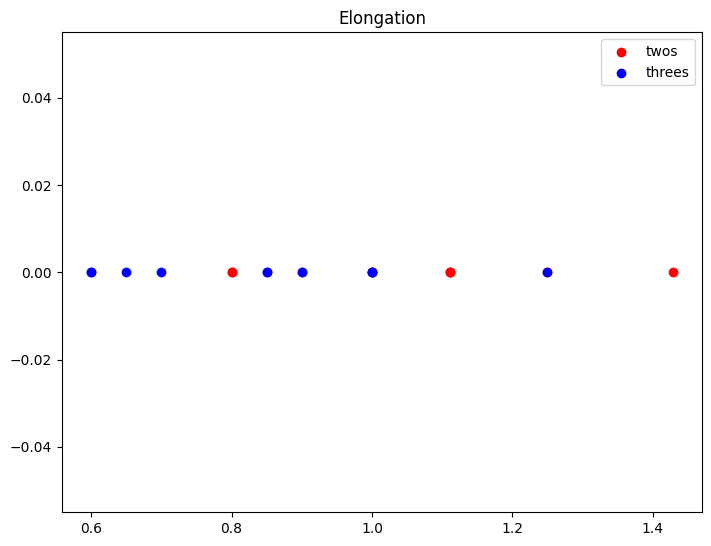

In [70]:
# Elongation: ratio between the major and minor axis of the bounding box
def get_elongation(img):
    # Get bounding box
    contour, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    x, y, w, h = cv2.boundingRect(contour[0])
    # Get elongation
    elongation = w / h
    return elongation

twos_elongation = [ get_elongation(twos_processed[i]) for i in range(len(twos_processed)) ]
threes_elongation = [ get_elongation(threes_processed[i]) for i in range(len(threes_processed)) ]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_elongation, np.zeros(len(twos_elongation)), color='r', label='twos')
ax.scatter(threes_elongation, np.zeros(len(threes_elongation)), color='b', label='threes')
ax.legend(loc='best')
plt.title("Elongation")
plt.show()


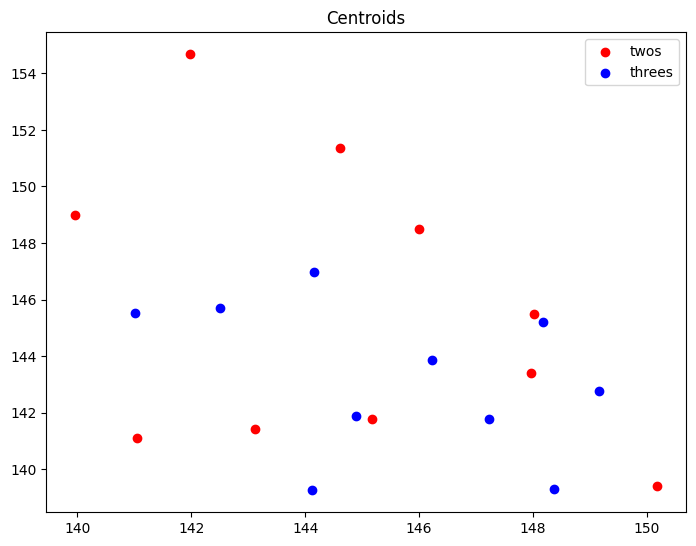

In [71]:
# Moments
def get_moments(img):
    contour, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    # Get moments
    moments = cv2.moments(contour[0])
    return moments

twos_moments = [ get_moments(twos_processed[i]) for i in range(len(twos_processed)) ]
threes_moments = [ get_moments(threes_processed[i]) for i in range(len(threes_processed)) ]
twos_centroids_x = [ twos_moments[i]['m10']/twos_moments[i]['m00'] if twos_moments[i]['m00'] != 0 else 0 for i in range(len(twos_moments)) ]
twos_centroids_y = [ twos_moments[i]['m01']/twos_moments[i]['m00'] if twos_moments[i]['m00'] != 0 else 0 for i in range(len(twos_moments)) ]
threes_centroids_x = [ threes_moments[i]['m10']/threes_moments[i]['m00'] if threes_moments[i]['m00'] != 0 else 0 for i in range(len(threes_moments)) ]
threes_centroids_y = [ threes_moments[i]['m01']/threes_moments[i]['m00'] if threes_moments[i]['m00'] != 0 else 0 for i in range(len(threes_moments)) ]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_centroids_x, twos_centroids_y, color='r', label='twos')
ax.scatter(threes_centroids_x, threes_centroids_y, color='b', label='threes')
ax.legend(loc='best')
plt.title("Centroids")
plt.show()

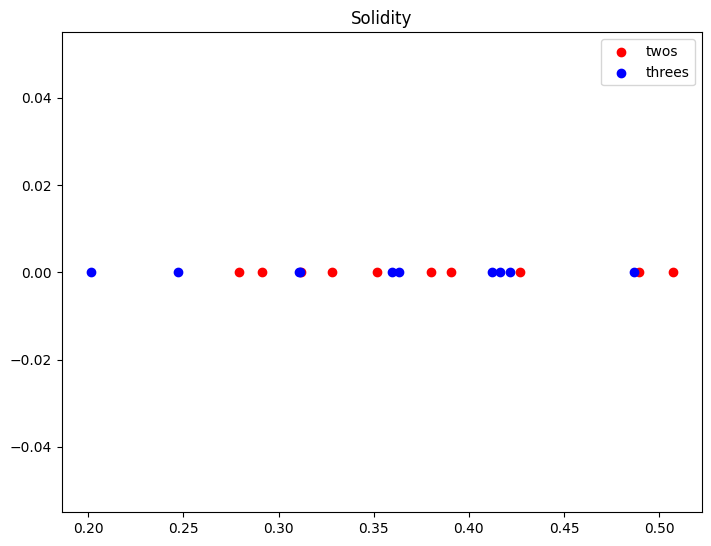

In [72]:
# Solidity: ratio between the area of the contour and the area of the bounding box
def get_solidity(img):
    contour, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    # Get bounding box
    x, y, w, h = cv2.boundingRect(contour[0])
    # Get area of bounding box
    area_bb = w * h
    # Get area of contour
    area_contour = cv2.contourArea(contour[0])
    # Get solidity
    solidity = area_contour / area_bb
    return solidity

twos_solidity = [ get_solidity(twos_processed[i]) for i in range(len(twos_processed)) ]
threes_solidity = [ get_solidity(threes_processed[i]) for i in range(len(threes_processed)) ]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_solidity, np.zeros(len(twos_solidity)), color='r', label='twos')
ax.scatter(threes_solidity, np.zeros(len(threes_solidity)), color='b', label='threes')
ax.legend(loc='best')
plt.title("Solidity")
plt.show()

#### Discussion

Different region-based method were employed as feature for the clustering.\
Most of them fail to yield significant results (i.e. the distinction between "2"s and "3"s is not clear on the plot).\
The main reason for this is that such methods (rectangularity, elongation, solidity) are still bound to the notion of area and/or perimeter. Hence, as it was shown in the previous discussion, they do not provide good results.\
In contrast, the 2D clustering based on the moments of the countorns gives the best result. Indeed, the moments simply represent the distribution of the pixels along the countorns, thus giving a better measure for the shape of the object.